# BUY or SELL
<i>Day Trading Cryptocurrency</i>

By: Jessica Yoon

##### What is Cryptocurrency?
Cryptocurrency is decentralized digital money designed (by utilizing blockchain technology) to be used over the internet. Compared to current version of currency and banking, cryptocurrency is quickly transferrable (cryptocurrency market runs 24/7 by computers), very private (little user information is stored per transaction), highly secure (due to blockchains), portable/accessible (due to the decentralized and digital nature of the currency), fully transparent (all transactions are public), and irreversible/immutable/safe (the method makes larger cryptocurrencies not hackable). Bitcoin is the first, oldest, and largest cryptocurrency created to date. Many vendors are beginning to accept cryptocurrency as payment which is pushing the narrative as cryptocurrency being the next "big thing."

##### What is Day Trading?
Day Trading is the practice of purchasing and selling a security within a single trading day. Making profit relies heavily on active trading techniques that exploit highly volatile stocks. Day trading is often characterized by technical analysis and requires a high degree of self-discipline and objectivity.


##### What are the common strategies employed?
For Beginners:

Dollar-Cost Averaging is highly recommended for learning the market. It is a strategy where the total investment is divided across periodic purchases of a security to reduce the impact of volatility on the overall purchase. This practice should be exercised on stocks believed to do well overtime (passive trading).

For Day Traders:
1. Scalping: make numerous small profits on small prices changes throughout the day
2. Range trading: utilize support and resistance levels to determine buy and sell decisions
3. News-based trading: seize trading opportunities from the heightened volatility around news events
4. High-frequency trading (HFT): employ sophisticated algorithms to exploit small or short-term market inefficiencies

### I. Objective
Explore and analyze timeseries data of Bitcoin (or any target cryptocurrency) to fit a SARIMA model and make predictions on whether to buy or sell cryptocurrency on a daily basis (time span of 24 hours).

### II. The [Data](https://www.kaggle.com/maxwells/btcusd)

Opensource historical data of Bitcoin (from March 20, 2011 to June 15, 2021) was obtained from [Kaggle](https://www.kaggle.com/). The data files were preprocessed using the Data_Concater and is explored below.

In [1]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Function to Split Columns of Main DataFrame into Individual DataFrames
def IndieFrames(dataframe):
    
    '''
    Pass in a DataFrame with multiple columns.
    Return a Dictionary of independent DataFrames.
    '''
    
    var_names = []
    for col in dataframe.columns:
        var_names.append(str(col) + '_')
    indieframes = {}
    for x in range(len(dataframe.columns)):
        indieframes['%s' % (var_names[x])] = dataframe[[dataframe.columns[x]]]
        
    return indieframes

In [3]:
# Importing and Exploring Data
data = pd.read_csv('data.csv')
data['time'] = pd.to_datetime(data['time'])
data.set_index('time', inplace=True)
print(data.info())
print(data.head())
print(data.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3741 entries, 2011-03-20 to 2021-06-15
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         3741 non-null   float64
 1   high         3741 non-null   float64
 2   low          3741 non-null   float64
 3   close        3741 non-null   float64
 4   tick_volume  3741 non-null   float64
dtypes: float64(5)
memory usage: 175.4 KB
None
            open  high   low  close  tick_volume
time                                            
2011-03-20  0.83   0.9  0.82   0.89      18828.0
2011-03-21  0.83   0.9  0.82   0.87      14009.0
2011-03-22  0.83   0.9  0.82   0.87      14009.0
2011-03-23  0.83   0.9  0.82   0.87      14009.0
2011-03-24  0.83   0.9  0.82   0.87      14009.0
                open      high       low     close  tick_volume
time                                                           
2021-06-11  36370.77  36732.39  36158.13  36711.09       4977.0


In [4]:
# Creating a Daily Profit/Loss (delta) Column
data['delta'] = data['close'] - data['open']

<AxesSubplot:xlabel='time'>

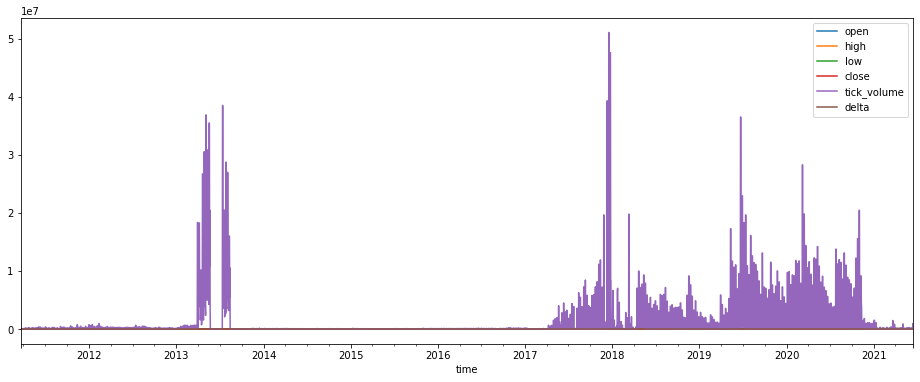

In [5]:
# Visualizing the Data
data.plot(figsize = (16,6))

<AxesSubplot:xlabel='time'>

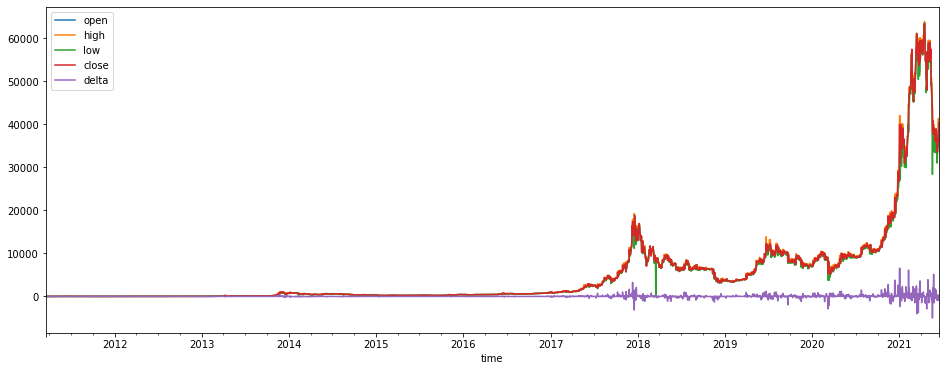

In [6]:
# Visualizing the Data Without tick_volume
data.drop(columns='tick_volume').plot(figsize = (16,6))

In [7]:
# Splitting Columns of Main DataFrame into Individual DataFrames
# For Visualization Purposes
frames = IndieFrames(data)

In [8]:
# Creating a Dictionary that Holds Preprocessed DataFrames
# For Visualization Purposes
readytoplot = {}
for key in frames.keys():
    
    # Idenfity inidividual years in the dataframe    
    grouped = frames[key].groupby(pd.Grouper(freq='A'))
    span = []
    for yr, groups in grouped:
        span.append(str(yr.year))
    
    # Split information by year
    yearly = {}
    for yr in span:
        yearly[yr] = frames[key].loc[yr]
    
    # Remove year from datetime index
    yearly_dfs= []
    for yr in yearly:
        yearly[yr].rename(columns={"%s" % (key.strip('_')):"%s%s" % (key, yr)}, inplace=True)
        yearly[yr]['MMDD'] = yearly[yr].index.strftime('%m-%d')
        yearly[yr].reset_index(inplace=True)
        yearly[yr].drop(columns='time', inplace=True)
        yearly_dfs.append(yearly[yr])
    
    yearly_dfs = [df.set_index('MMDD') for df in yearly_dfs]
    readytoplot[key] = yearly_dfs[0].join(yearly_dfs[1:], how='outer')
    readytoplot[key].sort_index(inplace=True)

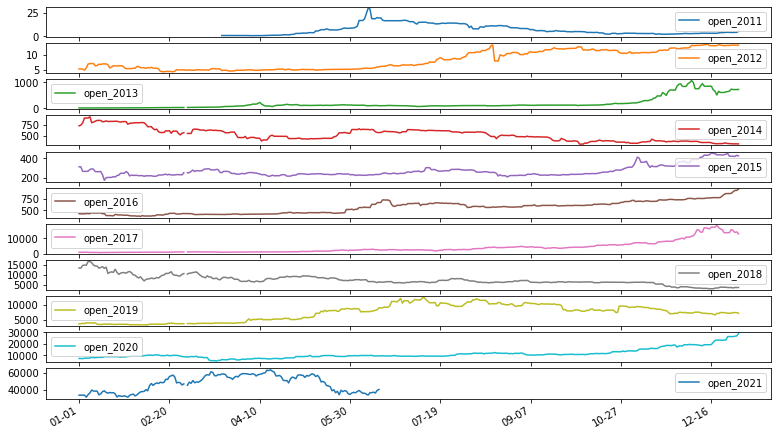

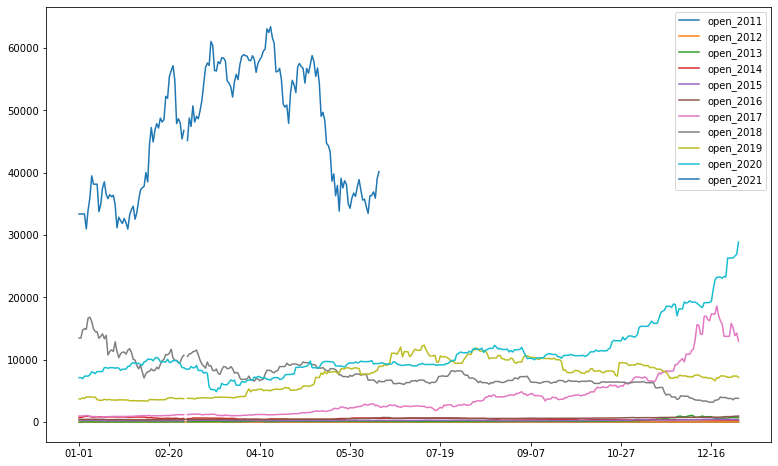

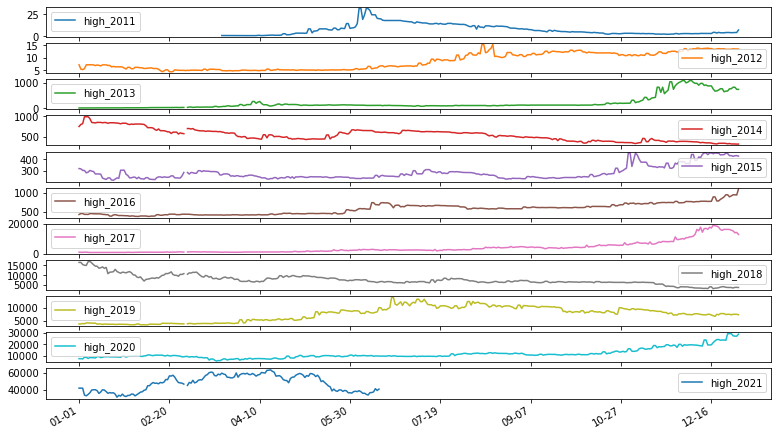

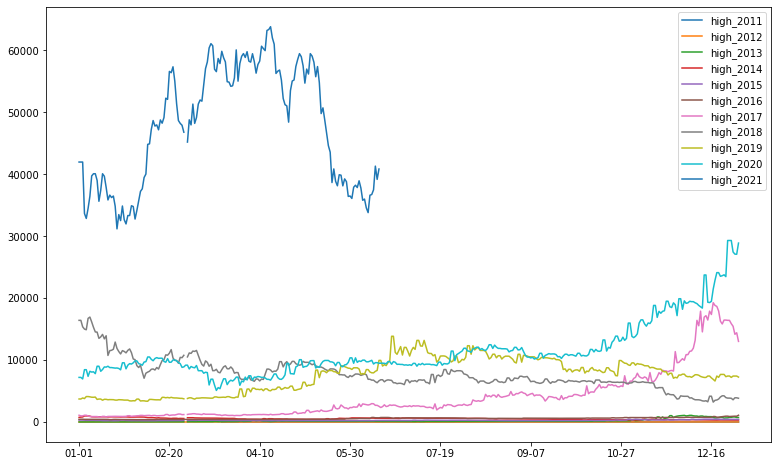

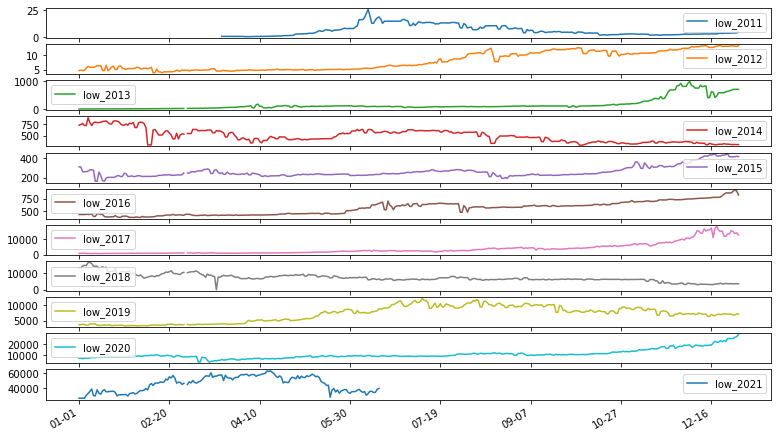

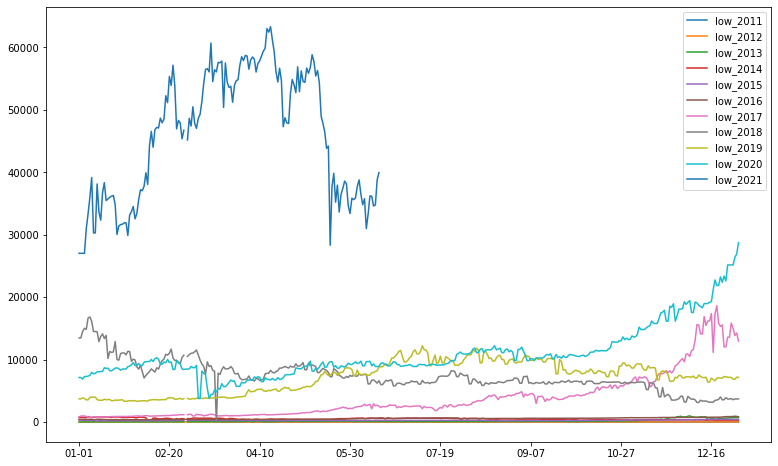

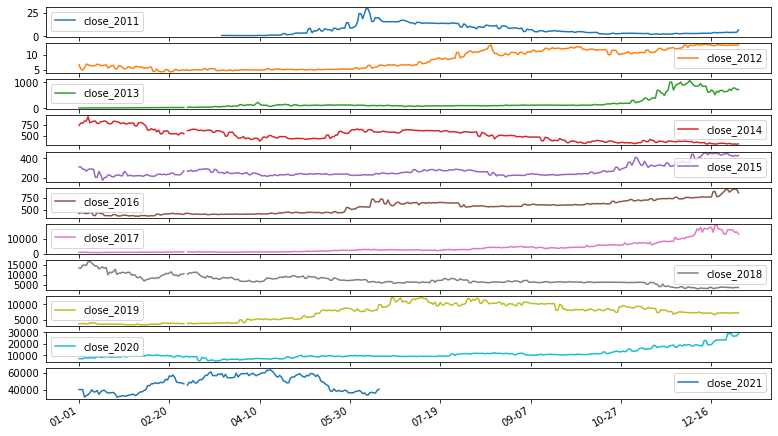

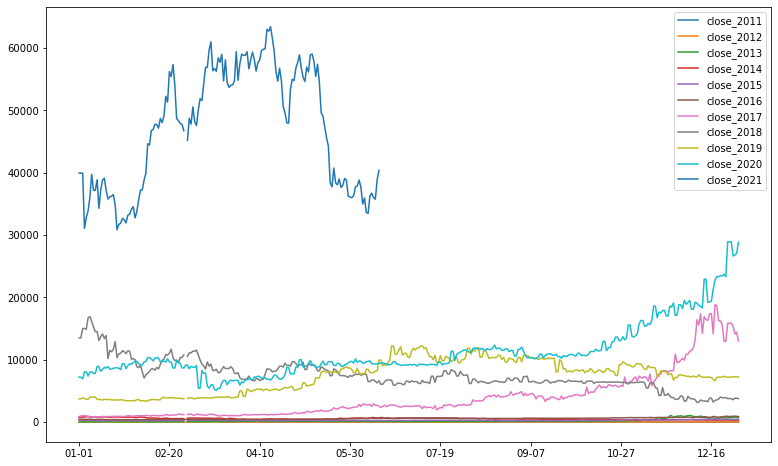

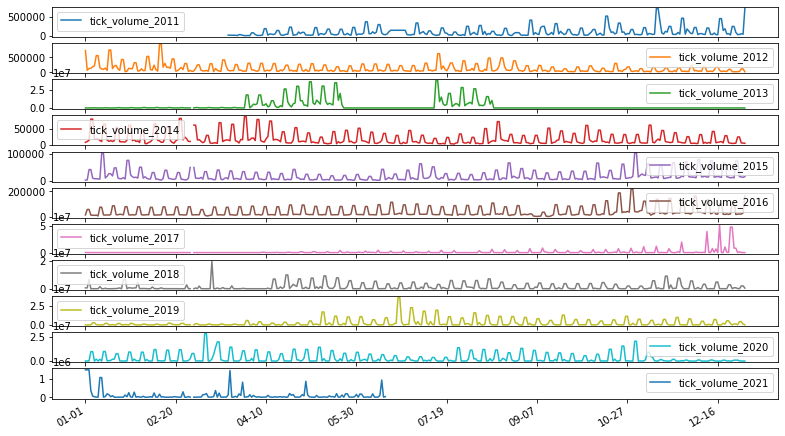

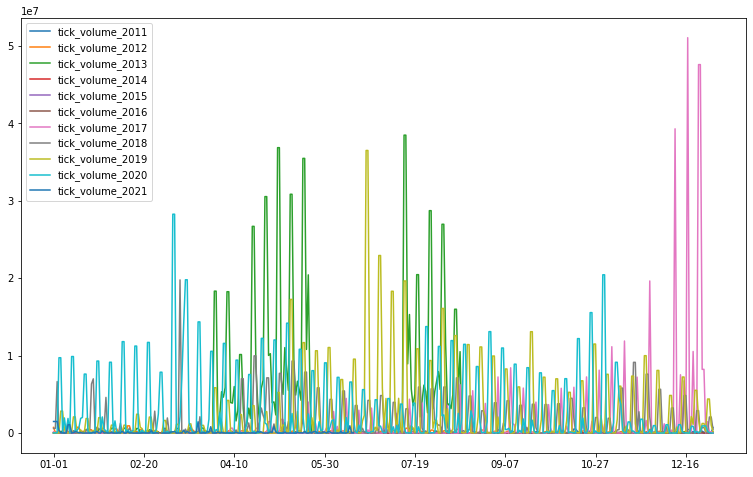

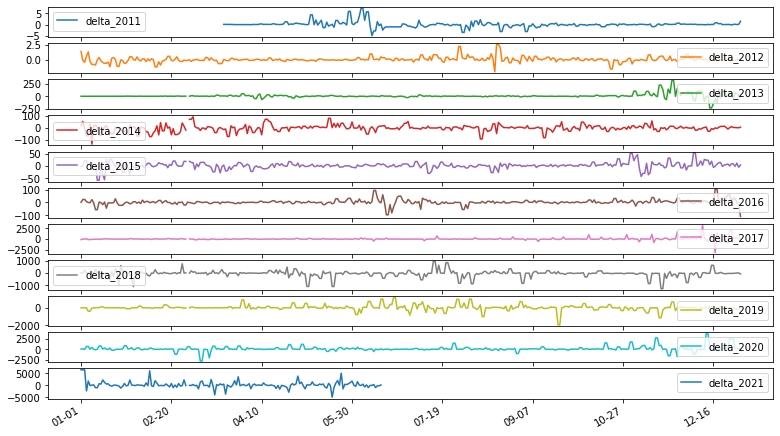

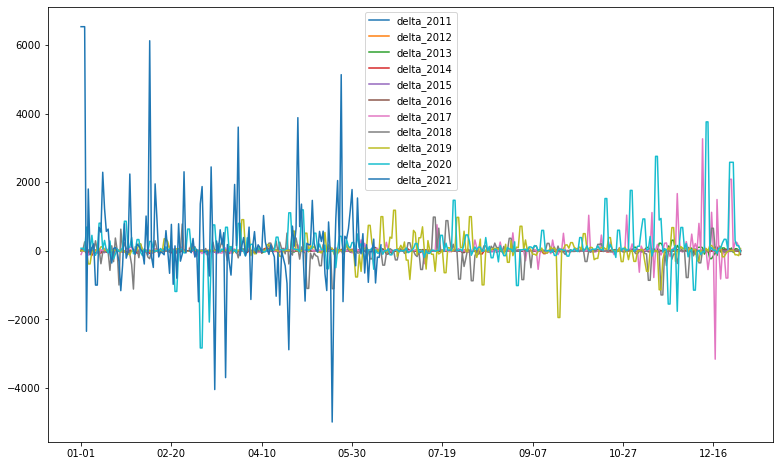

In [9]:
# Visualizing Data as Plots
for key in frames.keys():
    
    # Individual Plots
    readytoplot[key].plot(figsize = (13,8), subplots=True, legend=True)
    plt.show()
    
    # Combined Plot
    readytoplot[key].plot(figsize = (13,8), subplots=False, legend=True)
    plt.show()

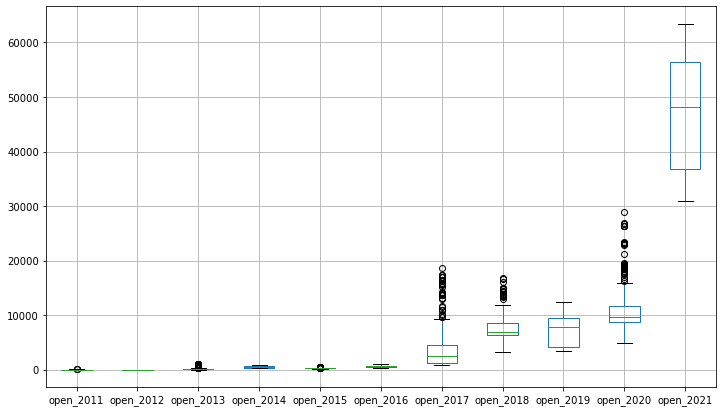

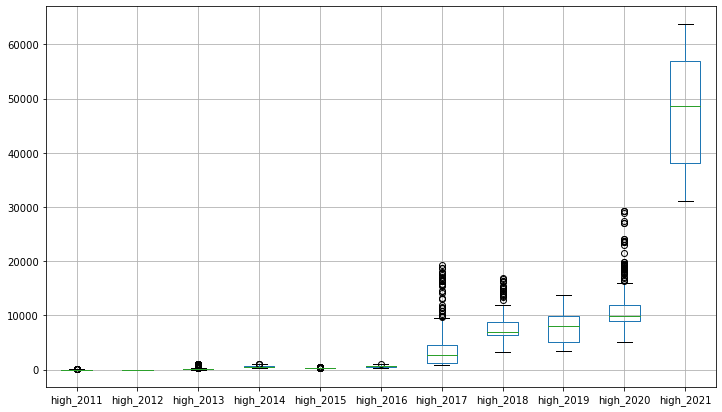

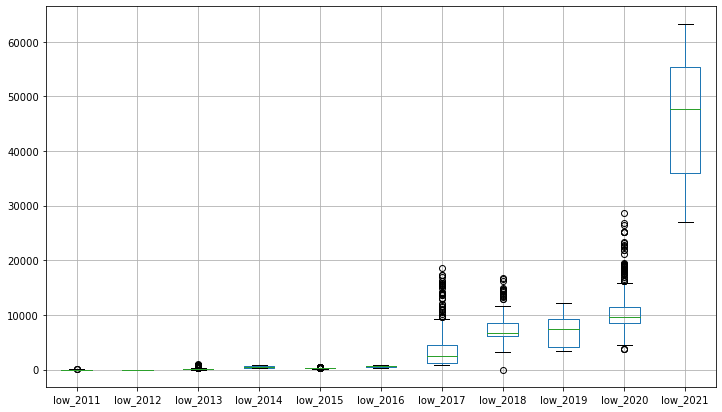

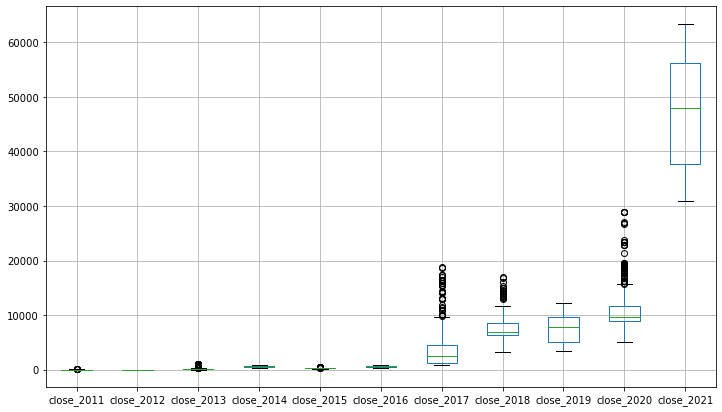

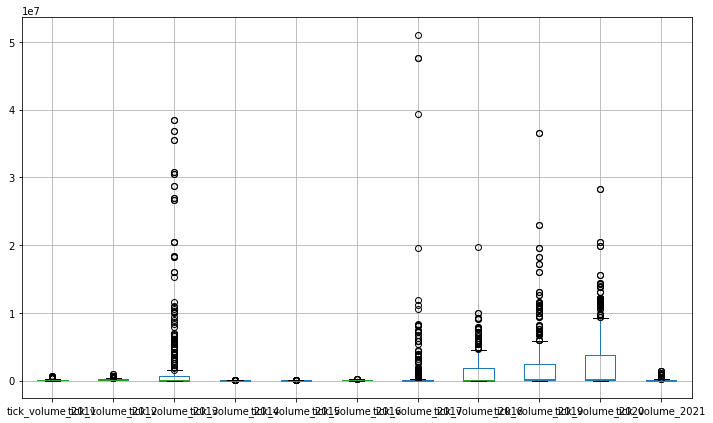

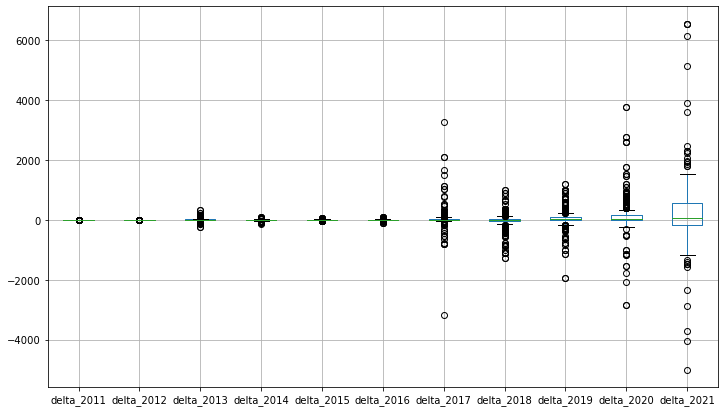

In [10]:
# Visualizing Data as Boxplots
for key in frames.keys():
    readytoplot[key].boxplot(figsize = (12,7));
    plt.show()

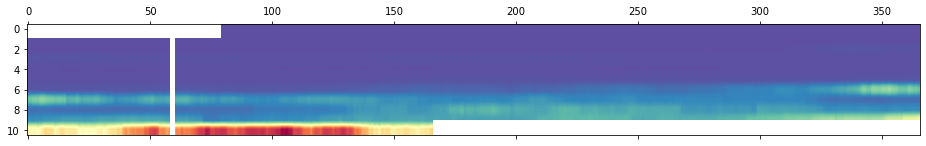

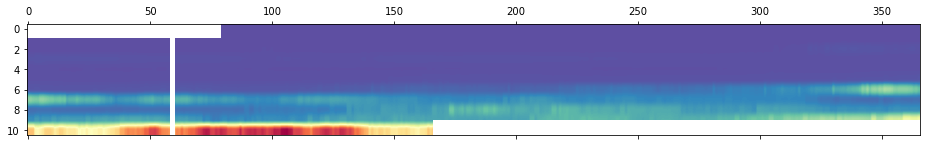

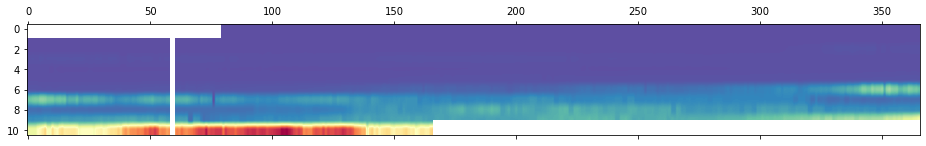

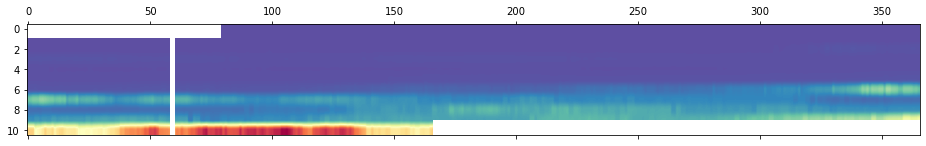

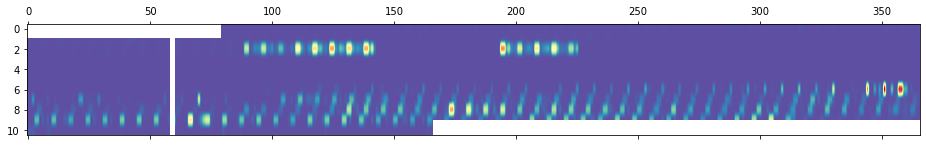

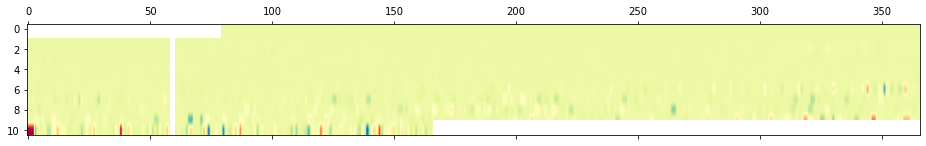

In [11]:
# Visualizing Data as Heatmaps
for key in frames.keys():
    year_matrix = readytoplot[key].T
    plt.matshow(year_matrix, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r)
    plt.show()

##### Notes:
The Data proves to be truly random. Bitcoin seems to grow at an astounding, yet unpredictable rate as observed visually. Various manipulations of the data prove fruitless to any significant pattern. There seems to be a large amont of tick volume on a biweekly basis as observed in the heatmaps. This may be due to the biweekly payroll patters, but interestingly it does not seem to be a significant impact on the trend of the data. The boxplots outliers lie on the higher spectrum as expected due to the rapid increase in value. 

In [12]:
# Print Keys for Focused Visualization
frames.keys()

dict_keys(['open_', 'high_', 'low_', 'close_', 'tick_volume_', 'delta_'])

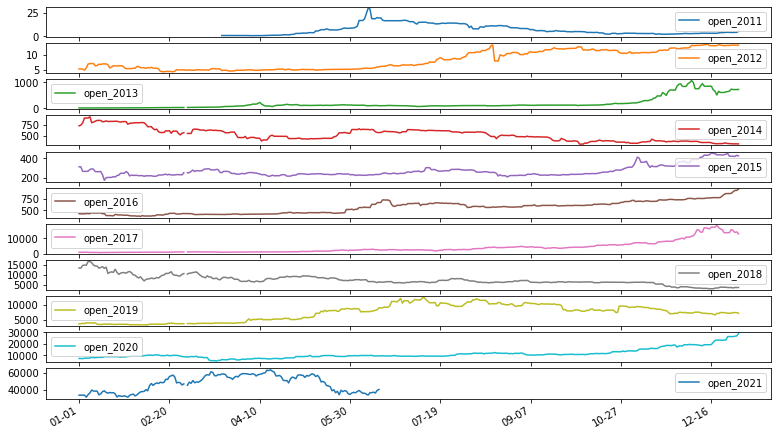

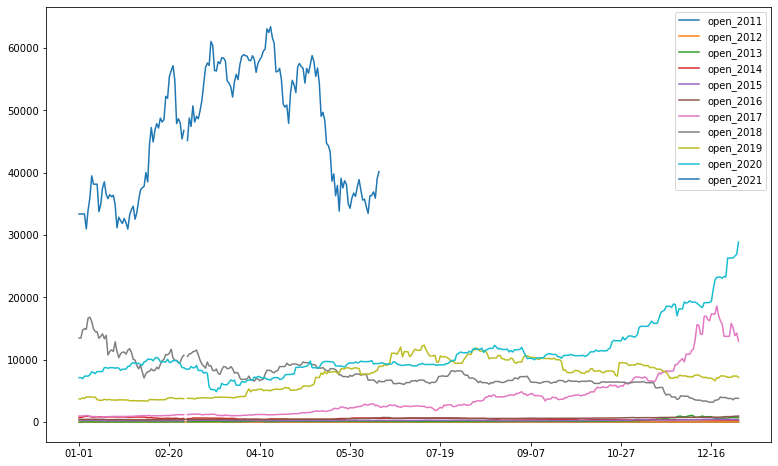

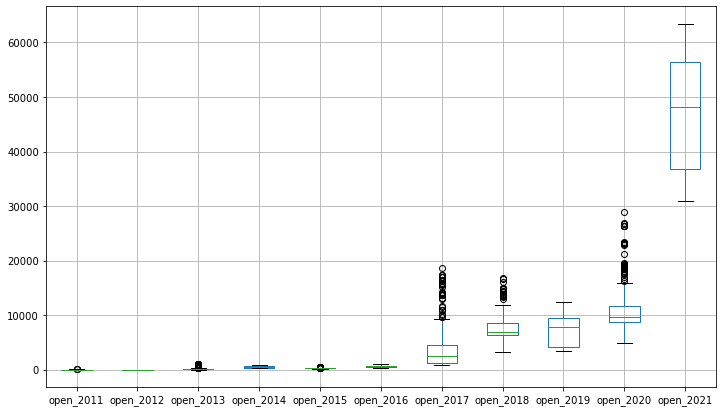

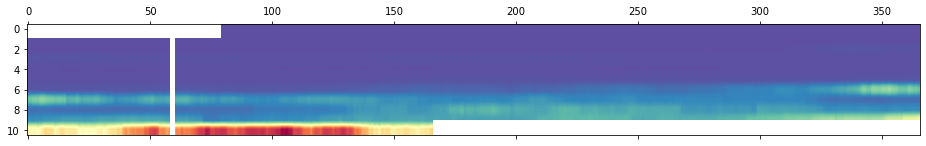

In [13]:
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# Individual Plots Focus
focus = 'open_' # Replace with any key above.

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# Plot
readytoplot[focus].plot(figsize = (13,8), 
                        subplots=True, 
                        legend=True)
plt.show()
readytoplot[focus].plot(figsize = (13,8), 
                        subplots=False, 
                        legend=True)
plt.show()

# Box Plot
readytoplot[focus].boxplot(figsize = (12,7))
plt.show()

# Heat Map
year_matrix = readytoplot[focus].T
plt.matshow(year_matrix, 
            interpolation=None, 
            aspect='auto', 
            cmap=plt.cm.Spectral_r)
plt.show()

In [14]:
# Reserving Data for Prediction Analysis
last28 = pd.DataFrame()
last28['value'] = data['open'].tail(28)

### III. The Model

A time-series model will be developed to identify trends in the data and predict values to help predict whether to buy or a sell a security of the cryptocurrency.

##### Vanilla/Baseline Models

In [15]:
# Importing Necessary Libraries
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima_model import ARMA
import itertools
import statsmodels.api as sm
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [16]:
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# Data Focus
series = data['open']

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

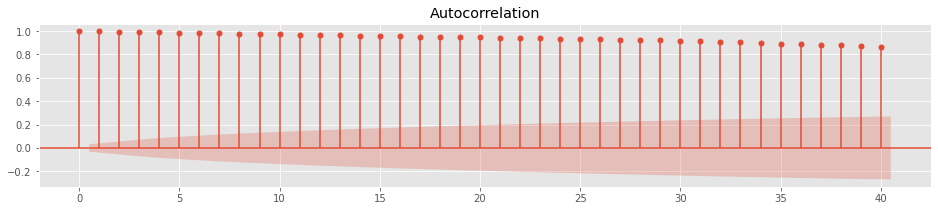

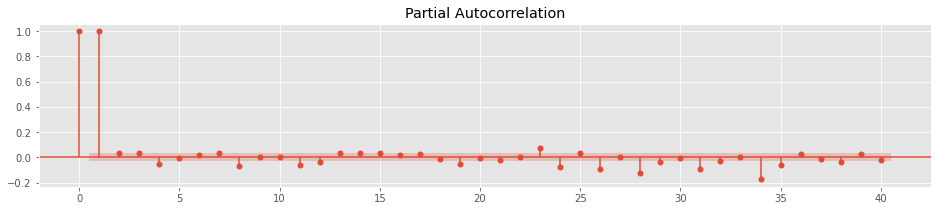

In [17]:
# Plotting ACF and PACF

fig, ax = plt.subplots(figsize=(16,3))
plot_acf(series, ax=ax, lags=40);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(series, ax=ax, lags=40);

The ACF and PACF plots are proving as predicted. The ACF lag tapers down slowly with all lags serving as statstically significant which shows the data is non-stationary. The PACF plot for lags 1 and 2 are statistically significant. The subsequent lags are also significant.

In [18]:
# Auto Regressive Model
mod_ar = ARMA(series, order=(1,0))
res_ar = mod_ar.fit()
print(res_ar.summary())
print(res_ar.params)

                              ARMA Model Results                              
Dep. Variable:                   open   No. Observations:                 3741
Model:                     ARMA(1, 0)   Log Likelihood              -28539.777
Method:                       css-mle   S.D. of innovations            497.215
Date:                Mon, 02 Aug 2021   AIC                          57085.555
Time:                        06:18:05   BIC                          57104.236
Sample:                    03-20-2011   HQIC                         57092.199
                         - 06-15-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5138.3884   2.02e+04      0.254      0.799   -3.45e+04    4.48e+04
ar.L1.open     0.9996      0.001   1471.714      0.000       0.998       1.001
                                    Roots           

In [19]:
# Moving Average Model
mod_ma = ARMA(series, order=(0,1))
res_ma = mod_ma.fit()
print(res_ma.summary())
print(res_ma.params)

                              ARMA Model Results                              
Dep. Variable:                   open   No. Observations:                 3741
Model:                     ARMA(0, 1)   Log Likelihood              -37362.307
Method:                       css-mle   S.D. of innovations           5260.237
Date:                Mon, 02 Aug 2021   AIC                          74730.614
Time:                        06:18:06   BIC                          74749.295
Sample:                    03-20-2011   HQIC                         74737.259
                         - 06-15-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5130.1186    169.468     30.272      0.000    4797.967    5462.270
ma.L1.open     0.9708      0.003    328.536      0.000       0.965       0.977
                                    Roots           

The auto regressive results have a lower AIC value than the moving average results as expected because the value increases rapidly over time, especially recently.

##### SARIMA Model

In [20]:
# Gridsearch Preparation

# Define the p, d and q parameters (between 0 and 2)
p = d = q = range(0, 2)

# Generate combinations of p, q and q
pdq = list(itertools.product(p, d, q))

# Generate combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) 
        for x in list(itertools.product(p, d, q))]

In [21]:
# Gridsearch to Obtain Optimal AIC Value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(series, #fill in variable here
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated = {}'
                  .format(comb, combs, output.aic))
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 80495.00779307488
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 77641.03604659987
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 66785.28377115802
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 66581.09824169769
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 66802.77484988442
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 66783.81512267073
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 66596.9586880205
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 66571.44603788809
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 77724.94219405449
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 76811.08205672173
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 63400.175396497645
ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 63138.60443432333
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 63434.46449231475
ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 63621.07181673631
ARIMA 

In [22]:
# Find the parameters with minimal AIC value (least fit)
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
min_AIC = ans_df.loc[ans_df['aic'].idxmin()]
min_AIC

pdq         (0, 1, 1)
pdqs    (1, 1, 1, 12)
aic           56727.7
Name: 31, dtype: object

In [23]:
# SARIMA Model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(series,
                                        order=min_AIC[0], 
                                        seasonal_order=min_AIC[1], 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0371      0.005     -7.465      0.000      -0.047      -0.027
ar.S.L12      -0.0626      0.005    -13.566      0.000      -0.072      -0.054
ma.S.L12      -0.9937      0.002   -504.856      0.000      -0.998      -0.990
sigma2      2.483e+05   1191.517    208.420      0.000    2.46e+05    2.51e+05


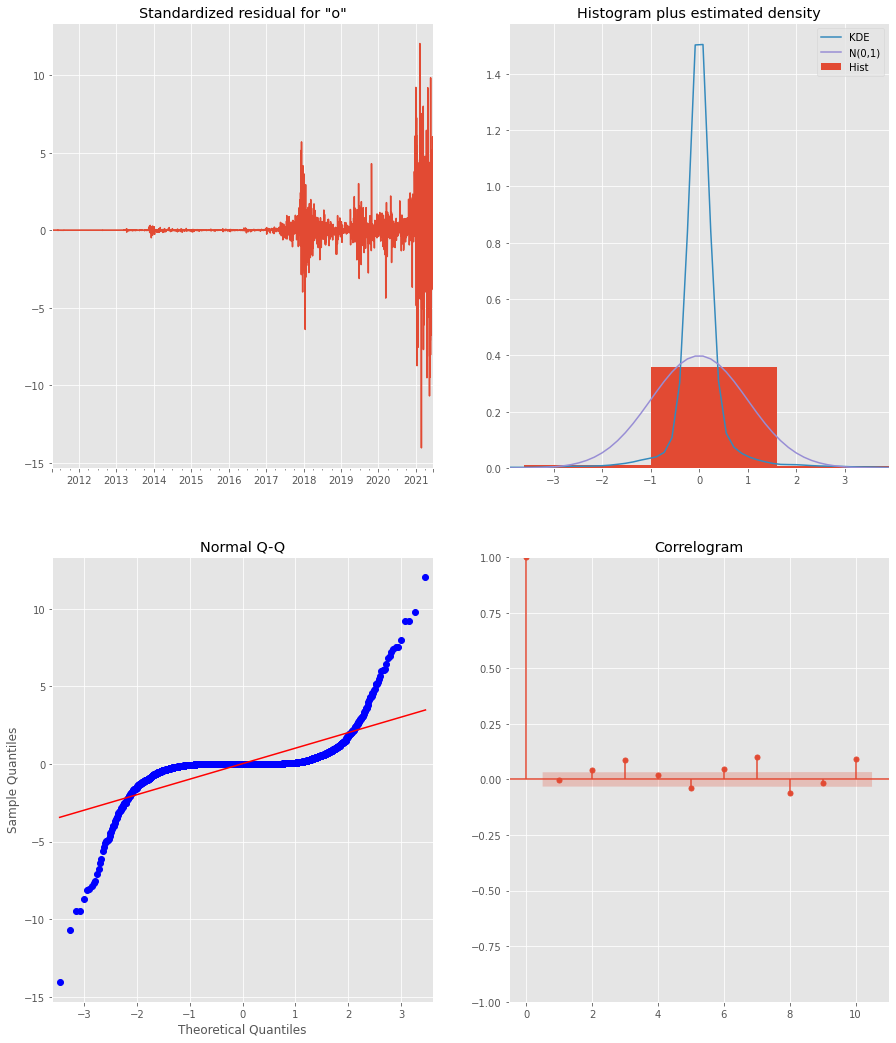

In [24]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

##### Model Conclusions
The model may not seem to have the best stats, with errors sitting at astoundingly high values. But any kind of investment market made for day traders is generally unpredictable and considering that cryptocurrency is still a very new form of currency, the changes in value over time are not going to reflect the likes of a more predictable index fund. The normal distribution plots as well as the qq plots will not be aligned with perfectly fitted data, but it will be enough to generally determine whether the market will be up or down.

### IV. The Application
Various predicted values will be extracted and later assessed on a day to day basis juxtaposed to other trandional/beginner investing methods.

In [25]:
# Function to Return Predictions
def predwithconf(fitted_model, start_time):
    
    '''
    Pass in a Fitted SARIMA Model and Analysis Start Time
    Returns a series of Prediction Averages and 
            a series of Confidence Intervals
    '''
    
    pred = fitted_model.get_prediction(
        start=pd.to_datetime(start_time),
        dynamic=False)
    pred_conf = pred.conf_int()
    pred = pred.predicted_mean
        
    return pred, pred_conf

In [26]:
# Function to Return Predictions
def dynpredwithconf(fitted_model, start_time):
    
    '''
    Pass in a Fitted SARIMA Model and Analysis Start Time
    Returns a series of Dynamic Prediction Averages and 
            a series of Confidence Intervals
    '''
    
    dynpred = fitted_model.get_prediction(
        start=pd.to_datetime(start_time),
        dynamic=True,
        full_results=True)
    dynpred_conf = dynpred.conf_int()
    dynpred = dynpred.predicted_mean
        
    return dynpred, dynpred_conf

In [27]:
# Function to Return One Step Ahead Plot
def osa(observed_values, predicted_values, 
        predicted_confidence_int):
    
    '''
    Pass in Predicted Values and 
            Respective Confidence Intervals
    Return the Plot
    '''
    
    fig, (ax) = plt.subplots(1, 1, 
                             sharex=True, 
                             figsize=(15, 6))
    observed_values.plot(label='observed')
    predicted_values.plot(label='predicted')
    x = observed_values.index
    y1 = predicted_confidence_int.iloc[:,0]
    y2 = predicted_confidence_int.iloc[:,1]
    ax.fill_between(x, y1, y2, color='g', alpha=0.5)

    # Set axes labels
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    plt.legend()
        
    return plt.show()

In [28]:
# Function to Compute MSE
def meansqe(observed_values, predicted_values,):
    
    '''
    Pass in Observed Values and Predicted Values
    Return the Mean Squared Error
    '''
    
    mse = ((observed_values - predicted_values)**2).mean()
        
    return round(mse,2)

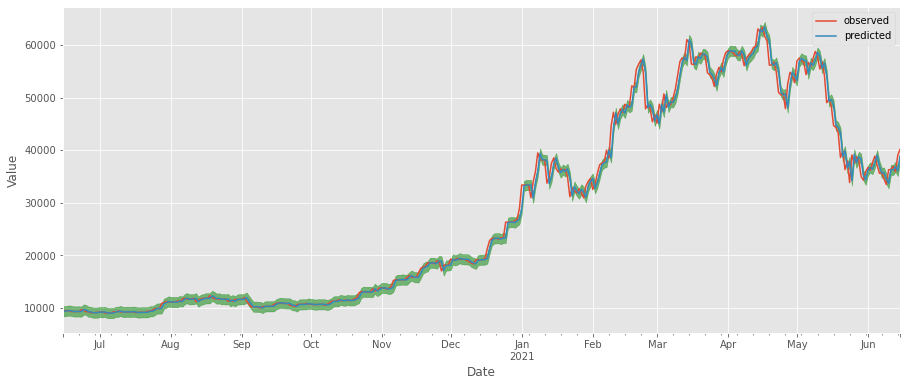

Mean Squared Error of Forecast: 2095132.07


In [29]:
# Data Analysis of Latest Year
year_start = '2020-06-15'
year_obsv = series[year_start:]
year_pred, year_conf = predwithconf(output, year_start)
year_mse = meansqe(year_obsv, year_pred)

osa(year_obsv, year_pred, year_conf)
print('Mean Squared Error of Forecast: {}'.format(year_mse))

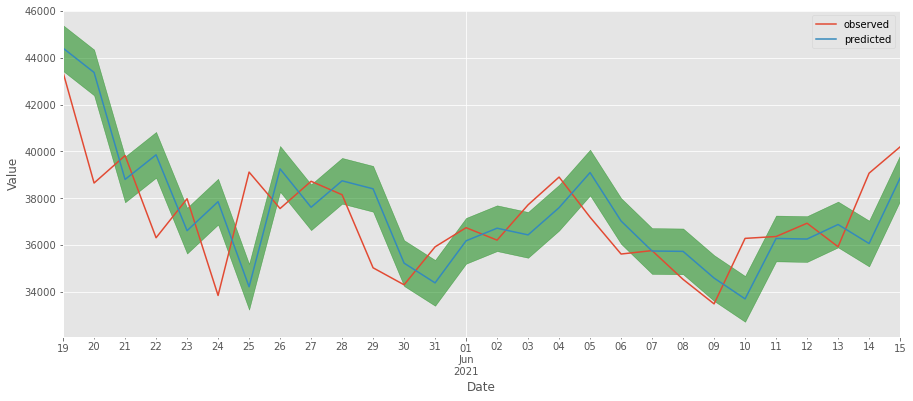

Mean Squared Error of Forecast: 4599330.65


In [30]:
# Data Analysis of Latest Month
month_start = '2021-05-19'
month_obsv = series[month_start:]
month_pred, month_conf = predwithconf(output, month_start)
month_mse = meansqe(month_obsv, month_pred)

osa(month_obsv, month_pred, month_conf)
print('Mean Squared Error of Forecast: {}'.format(month_mse))

In [31]:
# Reserving Data for Prediction Analysis
pred28 = month_pred

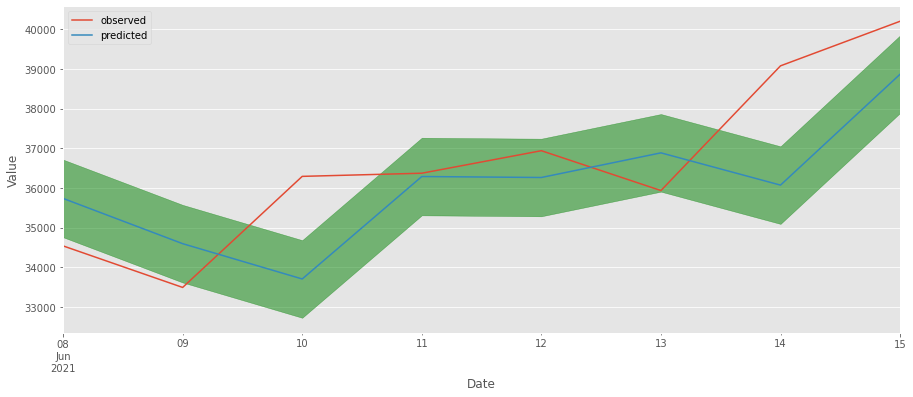

Mean Squared Error of Forecast: 2683633.76


In [32]:
# Data Analysis of Latest week
week_start = '2021-06-08'
week_obsv = series[week_start:]
week_pred, week_conf = predwithconf(output, week_start)
week_mse = meansqe(week_obsv, week_pred)

osa(week_obsv, week_pred, week_conf)
print('Mean Squared Error of Forecast: {}'.format(week_mse))

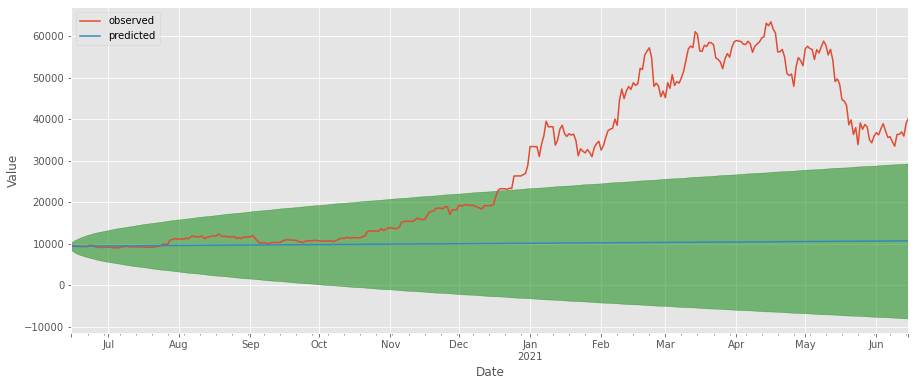

Mean Squared Error of Forecast: 661258954.58


In [33]:
# Data Analysis of Latest Year
year_start = '2020-06-15'
year_obsv = series[year_start:]
year_pred, year_conf = dynpredwithconf(output, year_start)
year_mse = meansqe(year_obsv, year_pred)

osa(year_obsv, year_pred, year_conf)
print('Mean Squared Error of Forecast: {}'.format(year_mse))

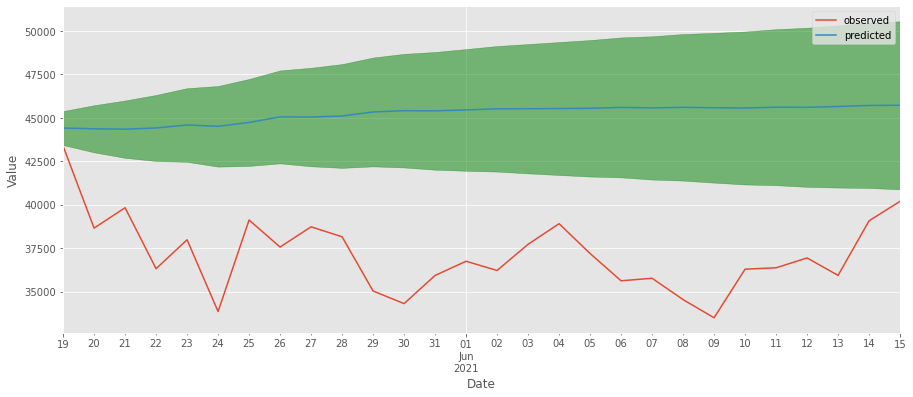

Mean Squared Error of Forecast: 70995605.9


In [34]:
# Data Analysis of Latest Month
month_start = '2021-05-19'
month_obsv = series[month_start:]
month_pred, month_conf = dynpredwithconf(output, month_start)
month_mse = meansqe(month_obsv, month_pred)

osa(month_obsv, month_pred, month_conf)
print('Mean Squared Error of Forecast: {}'.format(month_mse))

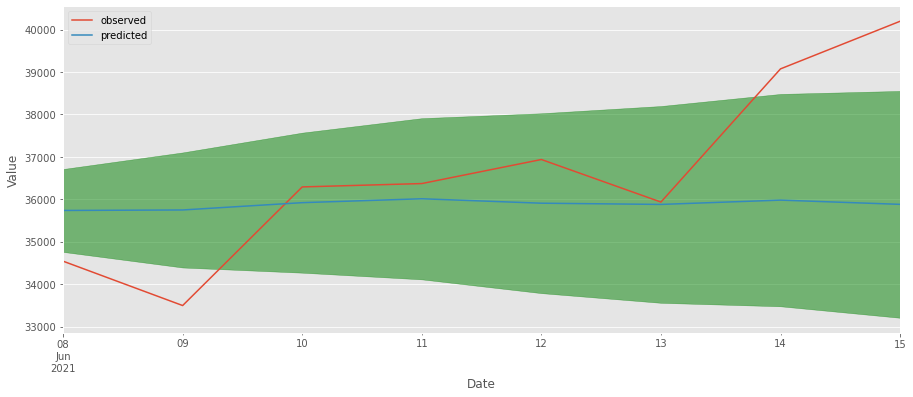

Mean Squared Error of Forecast: 4503158.18


In [35]:
# Data Analysis of Latest week
week_start = '2021-06-08'
week_obsv = series[week_start:]
week_pred, week_conf = dynpredwithconf(output, week_start)
week_mse = meansqe(week_obsv, week_pred)

osa(week_obsv, week_pred, week_conf)
print('Mean Squared Error of Forecast: {}'.format(week_mse))

In [36]:
# Get forecast 500 steps ahead in future
forecast = output.get_forecast(steps=500)

# Get confidence intervals of forecasts
forecast_conf = forecast.conf_int()

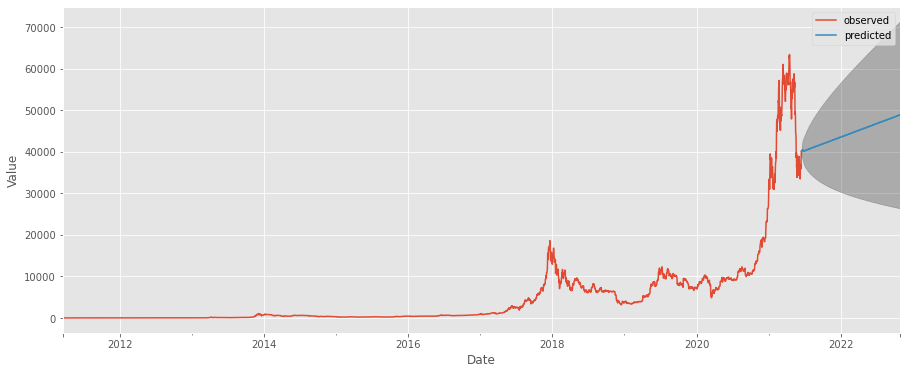

In [37]:
# Plot future predictions with confidence intervals
ax = series.plot(label='observed', 
                 figsize=(15, 6))
forecast.predicted_mean.plot(ax=ax, 
                             label='predicted')
ax.fill_between(forecast_conf.index,
                forecast_conf.iloc[:, 0],
                forecast_conf.iloc[:, 1], 
                color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Value')

plt.legend()
plt.show()

Overall, the nondynamic predictions are much more realistic in terms of predicting the data because the values don't follow a concrete trend. The random explosions of bull runs in the data prove dynamic predictions to be useless. However, when Day trading, only the immediate prediction matters most, so multistep predictions are as important without the most updated data available. With time and a sense of permanance, the cryptocurrency market may follow a similar trend as that of the index fund.

##### Profits Measured
Profits of a single investment, dollar cost average, and model prediction will be assessed with the latest 28 days worth of data to see how well the model performs.

In [38]:
# Variables
s_amount = 1000
dca_amount = s_amount/len(last28)

In [39]:
last28['pred'] = pred28

In [40]:
# Calculating a table of gains in terms of ROI
# for easier summation calculation.
for x in range(len(last28)):
    last28['roi%s' % x] = (last28['value'] - last28.iloc[x,0])/last28.iloc[x,0]

In [41]:
# Interpreting the model based on value prediction
# If the model predicts a lower value than today, sell
# If the model predicts a higher value than today, buy
last28['invest'] = 'yes'
for x in range(len(last28)):
    if x < len(last28)-1:
        if last28.iloc[x+1,1] < last28.iloc[x,0]:
            last28.iloc[x,30] = 'no'
        else:
            pass
    else:
        pass

In [42]:
last28

,value,pred,roi0,roi1,roi2,roi3,roi4,roi5,roi6,roi7,...,roi19,roi20,roi21,roi22,roi23,roi24,roi25,roi26,roi27,invest
time,,,,,,,,,,,,,,,,,,,,,
2021-05-19,43376.86,44410.410022,0.000000,0.122175,0.089168,0.194354,0.141987,0.281260,0.108806,0.154725,...,0.212673,0.255796,0.295000,0.195235,0.192630,0.174327,0.207104,0.110121,0.079131,no
2021-05-20,38654.27,43373.206516,-0.108873,0.000000,-0.029414,0.064321,0.017655,0.141765,-0.011914,0.029006,...,0.080645,0.119073,0.154009,0.065106,0.062784,0.046474,0.075683,-0.010741,-0.038358,yes
2021-05-21,39825.69,38807.365985,-0.081868,0.030305,0.000000,0.096575,0.048495,0.176366,0.018030,0.060190,...,0.113394,0.152986,0.188981,0.097384,0.094992,0.078187,0.108281,0.019238,-0.009215,yes
2021-05-22,36318.26,39857.263904,-0.162727,-0.060433,-0.088070,0.000000,-0.043845,0.072764,-0.071627,-0.033180,...,0.015338,0.051443,0.084268,0.000738,-0.001444,-0.016768,0.010675,-0.070526,-0.096473,yes
2021-05-23,37983.67,36620.023671,-0.124333,-0.017349,-0.046252,0.045856,0.000000,0.121957,-0.029056,0.011154,...,0.061897,0.099658,0.133988,0.046628,0.044346,0.028319,0.057021,-0.027904,-0.055041,no
2021-05-24,33854.85,37857.351017,-0.219518,-0.124163,-0.149924,-0.067828,-0.108700,0.000000,-0.134597,-0.098758,...,-0.053531,-0.019874,0.010724,-0.067141,-0.069174,-0.083459,-0.057877,-0.133570,-0.157758,yes
2021-05-25,39120.34,34225.751375,-0.098129,0.012057,-0.017711,0.077153,0.029925,0.155531,0.000000,0.041413,...,0.093675,0.132566,0.167923,0.077948,0.075598,0.059091,0.088653,0.001186,-0.026763,yes
2021-05-26,37564.67,39258.329373,-0.133993,-0.028188,-0.056773,0.034319,-0.011031,0.109580,-0.039766,0.000000,...,0.050184,0.087528,0.121479,0.035082,0.032826,0.016975,0.045361,-0.038627,-0.065465,yes
2021-05-27,38728.11,37619.640841,-0.107171,0.001910,-0.027560,0.066354,0.019599,0.143946,-0.010026,0.030972,...,0.082710,0.121210,0.156213,0.067141,0.064814,0.048473,0.077738,-0.008852,-0.036521,yes


In [43]:
# Calculating the profit/loss of Singular Investment
si = s_amount*last28.iloc[len(last28)-1, 2]
print('Singular Investment of $1000 yields ${}.'.format(round(si,2)))

Singular Investment of $1000 yields $-73.33.


In [44]:
# Calculating the profit/loss of Dollar Cost Averaging
# The yield will be the total of the daily investments.
dca = 0
for x in range(len(last28)):
    dca = dca + dca_amount*(last28.iloc[len(last28)-1,x+2])
print('Dollar Cost Averaging of total $1000 yields ${}.'.format(round(dca,2)))

Dollar Cost Averaging of total $1000 yields $85.79.


In [45]:
# Calculating the profit/loss of Model Predictions
# The yield will be held at a certain ROI before being sold
# or held at a certain balance before investment
mi = s_amount
roi = 0
for x in range(1, len(last28)):
    if last28.iloc[x, 30] == 'yes':
        if last28.iloc[x-1, 30] == 'no':
            roi = x
        else:
            pass
    elif last28.iloc[x, 30] == 'no':
        if last28.iloc[x-1, 30] == 'yes':
            mi = mi*(1 + (last28.iloc[x, roi+2]))
        else:
            pass
print('Model Investment of total $1000 yields ${}.'.format(round(mi-s_amount,2)))

Model Investment of total $1000 yields $218.27.


### V. Conclusion

The Model Investment outperformed the Dollar Cost Averaging strategy by more than double the profit. Blindly investing yielded a loss in value of the initial investment. However, although the simulation proved to be successful. The success does not prove to be profitable for day trading. To improve the model's prediction, hourly or even minute integrals can be taken to determine the even finer changes in data throughout the day. However, the model does not incorporate the other factors that influence the pattern of the cryptocurrency market.

All conclusions and final models do not guarantee any result and should only be used to aid the decision making process for investing. It is possible to have a large loss depending upon the flux of the market.

Areas of further exploration/improvement:
1. Explore Data as Classification Problem and incorporate use of other parameters
2. Use Timeseries data as a feature for another model
3. Explore different manipulations of data (delta vs open)